In [2]:
import pandas as pd
import numpy as np
import datetime
data = pd.read_pickle(r'C:\Users\shiva\Downloads\RELIANCE.pkl')
data = data.set_index('Date')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 524510 entries, 2015-02-02 09:15:00+05:30 to 2020-10-06 15:29:00+05:30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Symbol  524510 non-null  object 
 1   Open    524510 non-null  float64
 2   High    524510 non-null  float64
 3   Low     524510 non-null  float64
 4   Close   524510 non-null  float64
 5   Volume  524510 non-null  object 
dtypes: float64(4), object(2)
memory usage: 28.0+ MB


In [4]:
conversion = {'Open':'first','High':'max','Low':'min','Close':'last','Volume':'sum' }

In [5]:
data = data.resample('5Min',label='right').agg(conversion)

In [6]:
data['small'] = data['Close'].rolling(window=5).mean()
data['large'] = data['Close'].rolling(window=60).mean()

In [7]:
data=data.dropna()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22317 entries, 2015-02-02 14:15:00+05:30 to 2020-10-06 15:30:00+05:30
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    22317 non-null  float64
 1   High    22317 non-null  float64
 2   Low     22317 non-null  float64
 3   Close   22317 non-null  float64
 4   Volume  22317 non-null  int64  
 5   small   22317 non-null  float64
 6   large   22317 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.4 MB


In [9]:
data['smallcrossover'] = np.where((data['small']>data['large']) & (data['small'].shift()<data['large'].shift()),1,0) 

In [10]:
data['largecrossover'] = np.where((data['small']<data['large']) & (data['small'].shift()>data['large'].shift()),-1,0) 

In [11]:
data['sum'] = data['smallcrossover'] + data['largecrossover']

In [12]:
data

,Open,High,Low,Close,Volume,small,large,smallcrossover,largecrossover,sum
Date,,,,,,,,,,
2015-02-02 14:15:00+05:30,456.58,457.35,455.90,457.15,44198,456.936,456.839833,0,0,0
2015-02-02 14:20:00+05:30,457.15,458.10,456.53,457.00,167308,456.806,456.816000,0,-1,-1
2015-02-02 14:25:00+05:30,457.00,457.00,456.28,456.93,608020,456.992,456.806500,1,0,1
2015-02-02 14:30:00+05:30,456.93,457.00,456.30,456.50,41216,456.832,456.777333,0,0,0
2015-02-02 14:35:00+05:30,456.68,457.20,456.13,456.18,683302,456.752,456.747833,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-10-06 15:10:00+05:30,2209.35,2211.00,2208.30,2210.50,126076,2209.050,2209.850000,0,0,0
2020-10-06 15:15:00+05:30,2211.00,2212.00,2208.10,2210.95,216729,2209.240,2209.730833,0,0,0
2020-10-06 15:20:00+05:30,2211.65,2211.95,2209.00,2211.05,248686,2210.030,2209.634167,1,0,1


In [13]:
tradelog = pd.DataFrame(columns=['tradetype','entryprice','entrytime','exitprice','exittime'])

openpositions = 0

for index, row in data.iterrows():
    
    
    if index.time() < datetime.time(15,15):
        
        
        if row["sum"] != 0:
            if openpositions != 0:
                if row["sum"] == 1:
                    
                    tradelog.iloc[-1,3] = row["Close"]
                    tradelog.iloc[-1,4] = index
                    
                    tradelog = tradelog.append({"tradetype":"Long",\
                                                   "entryprice":row["Close"],\
                                                       "entrytime":index},ignore_index=True)
                    openpositions += 1
                if row["sum"] == -1:
                  
                    tradelog.iloc[-1,3] = row["Close"]
                    tradelog.iloc[-1,4] = index
                    tradelog = tradelog.append({"tradetype":"Short",\
                                                   "entryprice":row["Close"],\
                                                       "entrytime":index},ignore_index=True)
                    openpositions += 1
            
            if openpositions == 0:
                if row["sum"] == 1:
                    
                    tradelog = tradelog.append({"tradetype":"Long",\
                                                   "entryprice":row["Close"],\
                                                       "entrytime":index},ignore_index=True)
                    tradelog.iloc[-1,3] = row["Close"]
                    tradelog.iloc[-1,4] = index
                    openpositions += 1
                    
                if row["sum"] == -1:
                    tradelog = tradelog.append({"tradetype":"Short",\
                                                   "entryprice":row["Close"],\
                                                       "entrytime":index},ignore_index=True)
                    tradelog.iloc[-1,3] = row["Close"]
                    tradelog.iloc[-1,4] = index
                    
                    openpositions += 1
                    
                    
                    
    if index.time() > datetime.time(15,15):
    
        if openpositions != 0:
            
            tradelog.iloc[-1,3] = row["Close"]
            tradelog.iloc[-1,4] = index
            
            openpositions = 0

In [14]:
tradelog

,tradetype,entryprice,entrytime,exitprice,exittime
0,Short,457.00,2015-02-02 14:20:00+05:30,456.93,2015-02-02 14:25:00+05:30
1,Long,456.93,2015-02-02 14:25:00+05:30,456.25,2015-02-02 14:40:00+05:30
2,Short,456.25,2015-02-02 14:40:00+05:30,453.93,2015-02-02 15:20:00+05:30
3,Long,465.23,2015-02-03 14:15:00+05:30,467.53,2015-02-03 15:20:00+05:30
4,Short,467.18,2015-02-04 14:15:00+05:30,464.33,2015-02-04 15:20:00+05:30
...,...,...,...,...,...
1155,Long,2248.30,2020-09-29 14:15:00+05:30,2241.50,2020-09-29 15:20:00+05:30
1156,Long,2254.70,2020-09-30 14:30:00+05:30,2245.80,2020-09-30 14:55:00+05:30
1157,Short,2245.80,2020-09-30 14:55:00+05:30,2228.75,2020-09-30 15:20:00+05:30
1158,Long,2210.00,2020-10-06 14:50:00+05:30,2207.85,2020-10-06 15:00:00+05:30


In [15]:
tradelog["P/L"] = np.where(tradelog['tradetype']=="Short",tradelog['entryprice']-tradelog['exitprice'],tradelog["exitprice"]-tradelog["entryprice"])

In [16]:
tradelog

,tradetype,entryprice,entrytime,exitprice,exittime,P/L
0,Short,457.00,2015-02-02 14:20:00+05:30,456.93,2015-02-02 14:25:00+05:30,0.07
1,Long,456.93,2015-02-02 14:25:00+05:30,456.25,2015-02-02 14:40:00+05:30,-0.68
2,Short,456.25,2015-02-02 14:40:00+05:30,453.93,2015-02-02 15:20:00+05:30,2.32
3,Long,465.23,2015-02-03 14:15:00+05:30,467.53,2015-02-03 15:20:00+05:30,2.30
4,Short,467.18,2015-02-04 14:15:00+05:30,464.33,2015-02-04 15:20:00+05:30,2.85
...,...,...,...,...,...,...
1155,Long,2248.30,2020-09-29 14:15:00+05:30,2241.50,2020-09-29 15:20:00+05:30,-6.80
1156,Long,2254.70,2020-09-30 14:30:00+05:30,2245.80,2020-09-30 14:55:00+05:30,-8.90
1157,Short,2245.80,2020-09-30 14:55:00+05:30,2228.75,2020-09-30 15:20:00+05:30,17.05
1158,Long,2210.00,2020-10-06 14:50:00+05:30,2207.85,2020-10-06 15:00:00+05:30,-2.15


<AxesSubplot:>

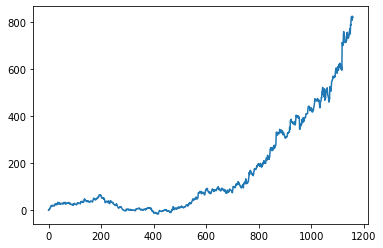

In [17]:
tradelog['P/L'].cumsum().plot()

In [18]:
tradelog['entrycost'] = np.where(tradelog['tradetype'] == 'Short',tradelog['entryprice'] -(1 - (0.035/100)),tradelog['entryprice'] + (1 - (0.035/100)))

In [19]:
tradelog['exitcost'] = np.where(tradelog['exitprice'] == 'Short', tradelog['exitprice'] + (1 - (0.035/100)),tradelog['exitprice'] - (1 - (0.035/100)))

In [20]:
tradelog["P/L_cost"] = np.where(tradelog['tradetype']=="Short",tradelog['entrycost']-tradelog['exitcost'],tradelog["exitcost"]-tradelog["entrycost"])

In [21]:
tradelog

,tradetype,entryprice,entrytime,exitprice,exittime,P/L,entrycost,exitcost,P/L_cost
0,Short,457.00,2015-02-02 14:20:00+05:30,456.93,2015-02-02 14:25:00+05:30,0.07,456.00035,455.93035,0.0700
1,Long,456.93,2015-02-02 14:25:00+05:30,456.25,2015-02-02 14:40:00+05:30,-0.68,457.92965,455.25035,-2.6793
2,Short,456.25,2015-02-02 14:40:00+05:30,453.93,2015-02-02 15:20:00+05:30,2.32,455.25035,452.93035,2.3200
3,Long,465.23,2015-02-03 14:15:00+05:30,467.53,2015-02-03 15:20:00+05:30,2.30,466.22965,466.53035,0.3007
4,Short,467.18,2015-02-04 14:15:00+05:30,464.33,2015-02-04 15:20:00+05:30,2.85,466.18035,463.33035,2.8500
...,...,...,...,...,...,...,...,...,...
1155,Long,2248.30,2020-09-29 14:15:00+05:30,2241.50,2020-09-29 15:20:00+05:30,-6.80,2249.29965,2240.50035,-8.7993
1156,Long,2254.70,2020-09-30 14:30:00+05:30,2245.80,2020-09-30 14:55:00+05:30,-8.90,2255.69965,2244.80035,-10.8993
1157,Short,2245.80,2020-09-30 14:55:00+05:30,2228.75,2020-09-30 15:20:00+05:30,17.05,2244.80035,2227.75035,17.0500
1158,Long,2210.00,2020-10-06 14:50:00+05:30,2207.85,2020-10-06 15:00:00+05:30,-2.15,2210.99965,2206.85035,-4.1493
